In [14]:
import data_helper
import sys
import os
from pathlib import Path
import importlib

sys.path.insert(0, os.path.join(os.path.dirname(os.path.abspath("")),"Code","Travis"))
import utils
import responses_analysis
import plotting
import config 

save_path = config.save_path
data_path = config.data_path

if not save_path.exists():
    save_path.mkdir()

test = utils.findUnanalyzedStacks(data_path, pattern="**/2P/L23/[0-9]*", foldername="all")
twop_mice = responses_analysis.get2Pmice(data_path, test)
twop_mice = data_helper.getData(twop_mice) ##load and analyze data with
twop_mice.head()

**/2P/L23/[0-9]* all


,Mouse,Sex,Genotype,DOB,2P_path,total_neurons,sig_responders,sound_responsive_percent,signalCorr,noiseCorr
0,m602,F,Thy1-GC6s; Cdh23 (Ahl/ahl),12/6/2021,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,663,121,18.250377,0.086338,0.005453
1,m603,F,Thy1-GC6s; Cdh23 (Ahl/ahl),12/6/2021,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,704,105,14.914773,0.052694,0.004246
2,m609,F,Thy1-GC6s; Cdh23 (ahl/ahl),12/6/2021,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,684,88,12.865497,0.045551,0.001923
3,m670,F,Thy1-GC6s; Cdh23 (Ahl/ahl),1/23/2022,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,1529,694,45.389143,0.076358,0.003595
4,m674,F,Thy1-GC6s; Cdh23 (ahl/ahl),1/23/2022,c:\Users\travisb\Dropbox (Personal)\Cdh23\Data...,2250,587,26.088889,0.053687,0.002320


C:\Users\travisb\AppData\Local\Temp\ipykernel_35460\1802483226.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ahl B6', 'Ahl+ B6'], ha='center',x=-.15)


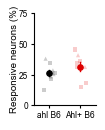

In [15]:
##2 genotypes
import seaborn as sns
import matplotlib.pyplot as plt
color_dict = config.color_dict
order = ['Thy1-GC6s; Cdh23 (ahl/ahl)','Thy1-GC6s; Cdh23 (Ahl/ahl)']
twop_noF1 = twop_mice[twop_mice['Genotype']!='(F1) Thy1-GC6s; Cdh23 (Ahl/ahl)']
fig, ax = plt.subplots(figsize=(0.8, 1.2))

sns.pointplot(twop_noF1, y="sound_responsive_percent", x="Genotype", hue = "Genotype", order = order, palette=color_dict, estimator='mean', errorbar='se', markersize=4, linewidth=1)
#sns.scatterplot(twop_mice, x="Genotype", y="sound_responsive_percent", hue = "Genotype", style="Sex", markers=['^','o'], legend = None, palette=color_dict, alpha = 0.3)
sns.stripplot(twop_noF1[twop_noF1['Sex']=='M'], y="sound_responsive_percent", x="Genotype", hue = "Genotype", marker='^', jitter = 0.2, size= 3, legend = None, palette=color_dict, alpha = 0.2)
sns.stripplot(twop_noF1[twop_noF1['Sex']=='F'], y="sound_responsive_percent", x="Genotype", hue = "Genotype", marker='s', jitter = 0.2, size=3, legend = None, palette=color_dict, alpha = 0.2)


plt.ylim([0,75])
plt.yticks([0,25,50,75])
ax.set_ylabel("Responsive neurons (%)", labelpad = 0, fontsize=7)
plt.xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticklabels(['ahl B6', 'Ahl+ B6'], ha='center',x=-.15)
plotting.figQuality(fig, ax)
plt.savefig(save_path / "Fig3_C_sound_responsive_two_genos.svg")

C:\Users\travisb\AppData\Local\Temp\ipykernel_35460\2307310738.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['ahl B6', 'Ahl+ B6', 'Ahl+\nCBA.B6'], ha='center',x=-.15)


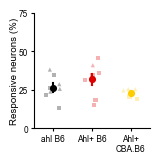

In [16]:
##3 genotypes
import seaborn as sn
color_dict = config.color_dict
order = config.order
fig, ax = plt.subplots(figsize=(1.5, 1.5))

sns.pointplot(twop_mice, y="sound_responsive_percent", x="Genotype", hue = "Genotype", order = order, palette=color_dict, markersize=4, linewidth=1.5, errorbar='se')
#sns.scatterplot(twop_mice, x="Genotype", y="sound_responsive_percent", hue = "Genotype", style="Sex", markers=['^','o'], legend = None, palette=color_dict, alpha = 0.3)
sns.stripplot(twop_mice[twop_mice['Sex']=='M'], y="sound_responsive_percent", x="Genotype", jitter = 0.2, hue = "Genotype", marker='^', size= 3, legend = None, palette=color_dict, alpha = 0.3)
sns.stripplot(twop_mice[twop_mice['Sex']=='F'], y="sound_responsive_percent", x="Genotype", jitter = 0.2, hue = "Genotype", marker='s', size=3, legend = None, palette=color_dict, alpha = 0.3)


plt.ylim([0,75])
plt.yticks([0,25,50,75])
ax.set_ylabel("Responsive neurons (%)", labelpad = 0, fontsize=7)
plt.xlabel('')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xticklabels(['ahl B6', 'Ahl+ B6', 'Ahl+\nCBA.B6'], ha='center',x=-.15)
plotting.figQuality(fig, ax)
plt.savefig(save_path / "SF2_A_sound_responsive_three_genos.svg")

In [17]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('sound_responsive_percent ~ C(Genotype) + C(Sex) + C(Genotype):C(Sex)', data=twop_mice).fit()
sm.stats.anova_lm(model, typ=2)

,sum_sq,df,F,PR(>F)
C(Genotype),347.605421,2.0,2.420611,0.122722
C(Sex),140.503264,1.0,1.956838,0.182188
C(Genotype):C(Sex),0.590864,2.0,0.004115,0.995895
Residual,1077.017406,15.0,NaN,NaN
